# Notebook 9

## Solución numérica de EDO (parte 2)

#### Python 🐍

> Dr. Ricardo Méndez Fragoso $\mathbb{R} i \vec c \hbar$


Primero llamemos a las bibliotecas que utilizaremos en este notebook:

In [1]:
from pylab import *

En caso de que la matriz Jacobiana no sea constante como en el notebook anterior, basta con identificar a `jacob` con una función y evaluarla en el punto correspondiente. De esta manera en la línea `8` de la la siguiente función, `Euler_mejorado_J`, se observa la evaluación de la matriz Jacobiana en cada paso de integración.

In [2]:
def Euler_mejorado_J(edo,p_ini,t,jacob):
    # Este solo tiene J y g sin dependencia temporal.
    sol = zeros((len(t),len(p_ini)))
    sol[0,:] = p_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        sol[i+1,:] = sol[i,:] + delta*edo(sol[i,:],t[i])
        sol[i+1,:] += 0.5*(delta**2)*dot(jacob(sol[i,:],t[i]),edo(sol[i,:],t[i])) # ojo sistema autonomo
    return sol

### Modelo logístico

De esta manera, también tenemos que programar una función que nos proporcione la matriz Jacobiana del sistema de EDO's. Veamos el ejemplo en una dimensión con el modelo logístico:

$$
\frac{dP}{dt} = aP(1-P)
$$

donde $P=P(t)$ es la población, y $a$ es la tasa de crecimiento o decrecimiento.

> Sin pérdida de generalidad, hemos elegido una población crítica unitaria.

En este caso, el equivalente a la matriz Jacobiana es un escalar dado por la siguiente expresión:

$$
J = a(1-2P)
$$

La EDO anterior y su equivalente Jacobiana quedan representadas por las siguientes funciones:

In [3]:
def modelo_logistico(P,t,a=0.1):
    return a*P *(1 -P)

def modelo_logistico_J(P,t,a=0.1):
    return a *(1 - 2*P)

La solución numérica para diferentes condiciones iniciales se ve de la siguiente manera.

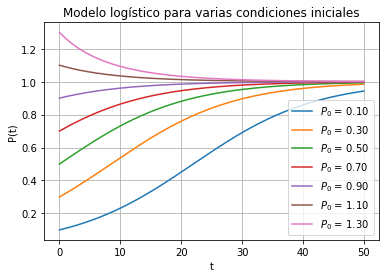

In [4]:
title("Modelo logístico para varias condiciones iniciales"),xlabel("t"),ylabel("P(t)")
tiempo = arange(0,50,0.01)
pob_ini_s = arange(0.1,1.5,0.2)
for pob_ini in pob_ini_s:
    solucion = Euler_mejorado_J(modelo_logistico,[pob_ini],tiempo,modelo_logistico_J)
    plot(tiempo,solucion,label="$P _0$ = %2.2f " %pob_ini )
legend(),grid()
show()

Como se puede apreciar, todas las poblaciones iniciales convergen a la población crítica, que en este caso es 1.

### Modelo Péndulo

Un modelo que utiliza la matriz Jacobiana dependiente de la posición es el péndulo, y más aún cuando se tiene amortiguamiento y/o forzamiento. La ecuación del péndulo es la siguiente:

$$
\frac{d^2\theta}{dt^2} = -\omega_0 ^2 \sin \theta
$$

donde $\omega _0 ^2 =\sqrt{\frac{g}{\ell}}$ es la llamada frecuencia fundamental del péndulo para ángulos pequeños. La ecuación anterior se puede escribir como un sistema de ecuaciones haciendo el cambio de variable $\frac{d\theta}{dt} = v_{\theta}$ y se obtiene el siguiente sistema de ecuaciones de primer orden:

$$
\frac{d\theta}{dt} = v_{\theta} \\
\frac{d v_{\theta}}{dt} = -\omega_0 ^2 \sin \theta
$$

La matriz Jacobiana de este sistema de ecuaciones es:
$$
\mathbb{J}=\left( \begin{array}{c c}
0 & 1 \\
-\omega_0 ^2 \cos \theta & 0
\end{array}\right)
$$
En este caso el sistema es autónomo, es decir, no depende explícitamente de $t$ y ello hace que la matriz sea cuadrada. Las anteriores ecuaciones quedan representadas por las siguientes funciones:

In [5]:
def pendulo(t_vt,t,omega_0 = 1):
    dth = t_vt[1]
    dv_th = -omega_0*sin(t_vt[0])
    return array([dth,dv_th])

def pendulo_J(t_vt,t,omega_0 = 1):
    J = zeros((2,2))
    J[0,1] = 1.0
    J[1,0] = -omega_0*cos(t_vt[0])
    return J

A continuación se muestra el Espacio Fase, $(\theta, v_{\theta})$, del sistema péndulo para varias condiciones iniciales del tipo $(\theta _0,0)$.

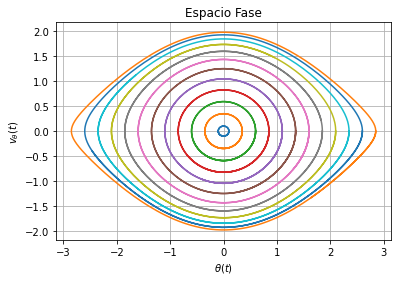

In [6]:
title("Espacio Fase"),xlabel(r"$\theta(t)$"),ylabel(r"$v_{\theta}(t)$")
tiempo = arange(0,5*pi,0.05)
th_ini_s = arange(0.1,pi-0.1,0.25)
for th_ini in th_ini_s:
    solucion = Euler_mejorado_J(pendulo,[th_ini,0],tiempo,pendulo_J)
    plot(solucion[:,0],solucion[:,1])
grid()
show()

Un modelo más realista al anterior es introducir amortiguamiento y forzamiento. Para ello, se propone que la fricción sea del tipo $ F_{fric} \propto \frac{d \theta}{dt} $ y el forzamiento $F_{forzamiento} \propto \cos(\omega_1 t)$. De esta manera la ecuación del péndulo se escribe como:

$$
\frac{d ^2 \theta}{dt^2} = -\omega_0 ^2 \sin \theta -\gamma \frac{d \theta}{dt} + A \cos (\omega_1 t)
$$

donde $\gamma$ es el coeficiente de amortiguamiento que absorbe las unidades y el coeficiente de fricción, $A$ es la amplitud efectiva del forzamiento y también se ajusta a las unidades adecuadas, y $\omega _1$ es la frecuencia del forzamiento. Haciendo el mismo cambio de variable para convertir la ecuación de segundo orden a un sistema de ecuaciones de primer orden se obtiene:

$$
\frac{d\theta}{dt} = v_{\theta} \\
\frac{d v_{\theta}}{dt} = -\omega_0 ^2 \sin \theta -\gamma v_{\theta} + A \cos (\omega_1 t)
$$

La matriz Jacobiana extendida del anterior sistema de ecuaciones es:
$$
\mathbb{J}^*=\left( \begin{array}{c c c}
0 & 1 & 0\\
-\omega_0 ^2 \cos \theta & -\gamma & -A\omega_1 \sin  (\omega_1 t)
\end{array}\right)
$$

Como se puede observar en este caso se tiene una matriz no cuadrada y el vector que representa las ecuaciones diferenciales debe completarse con un número 1 en una entrada extra al final del arreglo, $\vec g ^* = (\vec g, 1)$. Las siguientes funciones representan las ecuaciones anteriores:

In [7]:
def pendulo_ff(t_vt,t,omega_0=1.0,gamma=0.1,A_w=[0.1,0.1]):
    # t_vt = [ theta , v_theta ]
    dth = t_vt[1]
    dv_th = -omega_0*sin(t_vt[0]) - gamma*t_vt[1] + A_w[0]*cos(A_w[1]*t)
    return array([dth,dv_th,1.0])

def pendulo_ff_J(t_vt,t,omega_0=1.0,gamma=0.1,A_w=[0.1,0.1]):
    J = zeros((2,3))
    J[0,1] = 1.0
    J[1,0] = -omega_0*cos(t_vt[0])
    J[1,1] = -gamma
    J[1,2] = -A_w[0]*A_w[1]*sin(A_w[1]*t)
    return J

En el caso del algoritmo que utilizaremos para hacer la integración, es igual que el anterior, pero hay que tomar en cuenta que cabe la posibilidad de que el sistema no sea autónomo. En las líneas `7`a `11`se toma la decisión sobre cual de los dos algoritmos tomar en caso de que el sistema no sea autónomo. En cualquiera de los dos casos, la solución que se obtiene sólo debe contener el número de entradas igual al número de ecuaciones diferenciales y por ello en el caso de sistemas no autónomo, la suma del punto anterior termina en el penúltimo punto que en python se representa con `-1`, para que la suma de los vectores tengan la misma longitud. 

In [8]:
def Euler_mejorado_J_t(edo,p_ini,t,jacob):
    # J y g con dependencia temporal.
    sol = zeros((len(t),len(p_ini)))
    sol[0,:] = p_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        eval_edo = edo(sol[i,:],t[i])
        if len(eval_edo) == len(p_ini):
            sol[i+1,:] = sol[i,:] + delta*eval_edo
        else:
            sol[i+1,:] = sol[i,:] + delta*eval_edo[0:-1]
        sol[i+1,:] += 0.5*(delta**2) *dot( jacob(sol[i,:],t[i]) , eval_edo )
    return sol

A continuación vemos un ejemplo del péndulo en donde utilizamos los siguientes parámetros:
$$
\omega _0 = 1\\
\gamma = 0.1 \\
A = 0.1 \\
\omega _1 = 0.1
$$

Se hace la gráfica $\theta (t)$ y $v_{\theta} (t)$ como función de tiempo.

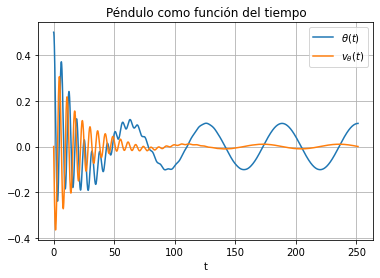

In [9]:
title("Péndulo como función del tiempo"),xlabel("t") 
tiempo = arange(0,80*pi,0.01)
solucion = Euler_mejorado_J_t(pendulo_ff,[0.5,0.0],tiempo,pendulo_ff_J)
plot(tiempo,solucion[:,0],label=r"$\theta (t)$")
plot(tiempo,solucion[:,1],label=r"$v_{\theta} (t)$")
legend(),grid()
show()

Como se puede apreciar, en ambas gráficas, al principio se observa el amortiguamiento, la parte transitoria en donde ya no hay tanto amortiguamiento, pero empieza a dominar la frecuencia de forzamiento y finalmente se tiene que el sistema termina oscilando con la frecuencia y la amplitud del forzamiento.

A continuación se observa el espacio fase de la simulación anterior y se dibujan de manera aproximada las tres etapas que se mencionan en el párrafo anterior.

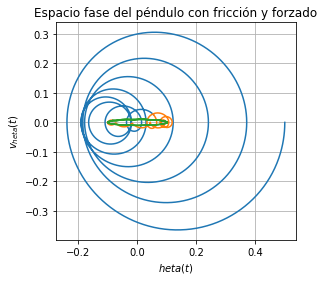

In [10]:
title("Espacio fase del péndulo con fricción y forzado"),xlabel("$\theta(t)$"),ylabel("$v_{\theta}(t)$")
plot(solucion[0:5000,0],solucion[0:5000,1],label="Trayectoria inicial",lw=1.5)
plot(solucion[5000:10000,0],solucion[5000:10000,1],label="Trasitorio",lw=1.5)
plot(solucion[10000:,0],solucion[10000:,1],label="Trayectoria final",lw=1.5)
gca().set_aspect("equal")
grid()
show()

Una modificación al algoritmo de integración es incorporar la capacidad de modificar los parámetros que vienen por defecto en la función que queremos resolver. También podemos poner todos los parámetros de las funciones en una sola variable como se muestra a continuación en las líneas `4`, y `12` para el caso de las funciones que representan el sistema de ecuaciones diferenciales. En el caso del algoritmo de integración, basta con hacer la evaluación del sistema de ecuaciones diferenciales `edo` y `jacob` con la variable `param`.

In [11]:
def pendulo_ff(t_vt,t,param=[1,0.1,0.1,0.1]):
    # t_vt = [ theta , v_theta ]
    # param = [ omega 0 , gamma , A , omega 1]
    omega_0,gamma,A,omega_1=param
    dth = t_vt[1]
    dv_th = -omega_0*sin(t_vt[0]) - gamma*t_vt[1] + A*cos(omega_1*t)
    return array([dth,dv_th,1.0])

def pendulo_ff_J(t_vt,t,param=[1,0.1,0.1,0.1]):
    # t_vt = [ theta , v_theta ]
    # param = [ omega 0 , gamma , A , omega 1]
    omega_0,gamma,A,omega_1=param
    J = zeros((2,3))
    J[0,1] = 1.0
    J[1,0] = -omega_0*cos(t_vt[0])
    J[1,1] = -gamma
    J[1,2] = -A*omega_1*sin(omega_1*t)
    return J

def Euler_mejorado_J_t_p(edo,p_ini,t,jacob,param):
    # J y g con dependencia temporal y de parametros externos
    sol = zeros((len(t),len(p_ini)))
    sol[0,:] = p_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        eval_edo = edo(sol[i,:],t[i],param)
        if len(eval_edo) == len(p_ini):
            sol[i+1,:] = sol[i,:] + delta*eval_edo
        else:
            sol[i+1,:] = sol[i,:] + delta*eval_edo[0:-1]
        sol[i+1,:] += 0.5*(delta**2) *dot( jacob(sol[i,:],t[i],param) , eval_edo )
    return sol

De esta manera podemos utilizar la variable `param` para cambiar la frecuencia de oscilación de forzamiento. En la siguiente simulación se utilizan los mismos parámetros que los anteriores, pero con frecuencia de forzamiento $\omega _1 =$ 0.1, 0.5 y 1. 

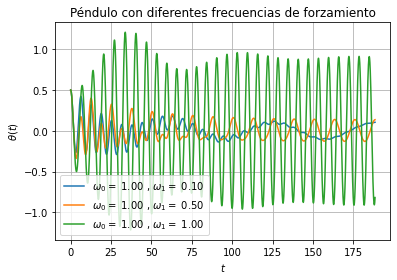

In [12]:
title("Péndulo con diferentes frecuencias de forzamiento"),xlabel(r"$t$"),ylabel(r"$\theta(t)$")
tiempo = arange(0,60*pi,0.01)
omegas_1 = [0.1,0.5,1]
for omega_1 in  omegas_1:
    param = [1,0.05,0.1,omega_1]
    solucion = Euler_mejorado_J_t_p(pendulo_ff,[0.5,0.0],tiempo,pendulo_ff_J,param)
    plot(tiempo,solucion[:,0],lw=1.5,label="$\omega _0=$ %2.2f , $\omega_1=$ %2.2f" %(param[0],param[3] ))
legend(),grid()
show()

Como se puede observar, en el caso con las frecuencias de forzamiento $\omega _1 = $ 0.1 y 0.5 la amplitud final de oscilación no sobre pasa la amplitud del forzamiento, pero para $\omega _1 = 1$ se tiene que la oscilación final se ve amplificada debido a que el sistema entra en resonancia.

Hasta ahora se han visto métodos explícitos para la integración de EDO's. En el siguiente notebook se verán métodos implícitos que requieren una programación más sencilla y con los que se puede lograr la misma o mayor precisión.

[Regresar a la página del curso.](http://sistemas.fciencias.unam.mx/~rich/FisComp/)

Se agradece el apoyo del proyecto DGAPA-PAPIME:

+ PE 103021 nueva versión durante el año 2022. Versión interactiva en Colab.
+ PE 112919 durante el año 2020. Idea original.